In [67]:
# initial setup
try:
    # settings colab:
    import google.colab
    
except ModuleNotFoundError:    
    # settings local:
    %run "common/0_notebooks_base_setup.py"

ERROR:root:File `'common/0_notebooks_base_setup.py'` not found.


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [70]:
df = pd.read_csv('Data/COMERCIOS.TXT', sep='\t')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26082 entries, 0 to 26081
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PERIODO                        26082 non-null  object 
 1   ID_ZONA                        26082 non-null  int64  
 2   RUBRO                          26082 non-null  object 
 3   NIVEL_RIESGO                   26082 non-null  int64  
 4   APERTURAS                      26082 non-null  float64
 5   CIERRES                        26082 non-null  float64
 6   SUPERVIVENCIA                  21473 non-null  float64
 7   PROMEDIO_VENTAS                26082 non-null  int64  
 8   NIVEL_CRECIMIENTO              23184 non-null  float64
 9   NIVEL_ESTABILIDAD              24843 non-null  float64
 10  CANTIDAD_LOCALES               26082 non-null  int64  
 11  SUPERV_MENOS_1                 26082 non-null  float64
 12  SUPERV_ENTRE_1_Y_2             26082 non-null 

In [72]:
df.columns.values

array(['PERIODO', 'ID_ZONA', 'RUBRO', 'NIVEL_RIESGO', 'APERTURAS',
       'CIERRES', 'SUPERVIVENCIA', 'PROMEDIO_VENTAS', 'NIVEL_CRECIMIENTO',
       'NIVEL_ESTABILIDAD', 'CANTIDAD_LOCALES', 'SUPERV_MENOS_1',
       'SUPERV_ENTRE_1_Y_2', 'SUPERV_ENTRE_2_Y_3', 'SUPERV_ENTRE_3_Y_4',
       'SUPERV_ENTRE_4_Y_5', 'SUPERV_MAS_5', 'ANIO_ANTERIOR',
       'PROMEDIO_VENTAS_ANIO_ANTERIOR', 'APERTURAS_ANIO_ANTERIOR',
       'CIERRES_ANIO_ANTERIOR', 'TENDENCIA_APERTURAS',
       'TENDENCIA_CIERRES'], dtype=object)

In [73]:
df = df[['PERIODO', 'ID_ZONA', 'RUBRO', 'NIVEL_RIESGO', 'APERTURAS',
       'CIERRES', 'SUPERVIVENCIA', 'PROMEDIO_VENTAS', 'CANTIDAD_LOCALES', 'SUPERV_MENOS_1',
       'SUPERV_ENTRE_1_Y_2', 'SUPERV_ENTRE_2_Y_3', 'SUPERV_ENTRE_3_Y_4',
       'SUPERV_ENTRE_4_Y_5', 'SUPERV_MAS_5']]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26082 entries, 0 to 26081
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PERIODO             26082 non-null  object 
 1   ID_ZONA             26082 non-null  int64  
 2   RUBRO               26082 non-null  object 
 3   NIVEL_RIESGO        26082 non-null  int64  
 4   APERTURAS           26082 non-null  float64
 5   CIERRES             26082 non-null  float64
 6   SUPERVIVENCIA       21473 non-null  float64
 7   PROMEDIO_VENTAS     26082 non-null  int64  
 8   CANTIDAD_LOCALES    26082 non-null  int64  
 9   SUPERV_MENOS_1      26082 non-null  float64
 10  SUPERV_ENTRE_1_Y_2  26082 non-null  float64
 11  SUPERV_ENTRE_2_Y_3  26082 non-null  float64
 12  SUPERV_ENTRE_3_Y_4  26082 non-null  float64
 13  SUPERV_ENTRE_4_Y_5  26082 non-null  float64
 14  SUPERV_MAS_5        26082 non-null  float64
dtypes: float64(9), int64(4), object(2)
memory usage: 3.0+

In [75]:
df.dropna(inplace=True)

In [76]:
df.isnull().sum()

PERIODO               0
ID_ZONA               0
RUBRO                 0
NIVEL_RIESGO          0
APERTURAS             0
CIERRES               0
SUPERVIVENCIA         0
PROMEDIO_VENTAS       0
CANTIDAD_LOCALES      0
SUPERV_MENOS_1        0
SUPERV_ENTRE_1_Y_2    0
SUPERV_ENTRE_2_Y_3    0
SUPERV_ENTRE_3_Y_4    0
SUPERV_ENTRE_4_Y_5    0
SUPERV_MAS_5          0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21473 entries, 0 to 26081
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PERIODO             21473 non-null  object 
 1   ID_ZONA             21473 non-null  int64  
 2   RUBRO               21473 non-null  object 
 3   NIVEL_RIESGO        21473 non-null  int64  
 4   APERTURAS           21473 non-null  float64
 5   CIERRES             21473 non-null  float64
 6   SUPERVIVENCIA       21473 non-null  float64
 7   PROMEDIO_VENTAS     21473 non-null  int64  
 8   CANTIDAD_LOCALES    21473 non-null  int64  
 9   SUPERV_MENOS_1      21473 non-null  float64
 10  SUPERV_ENTRE_1_Y_2  21473 non-null  float64
 11  SUPERV_ENTRE_2_Y_3  21473 non-null  float64
 12  SUPERV_ENTRE_3_Y_4  21473 non-null  float64
 13  SUPERV_ENTRE_4_Y_5  21473 non-null  float64
 14  SUPERV_MAS_5        21473 non-null  float64
dtypes: float64(9), int64(4), object(2)
memory usage: 2.6+

In [78]:
df['NIVEL_RIESGO'].value_counts()

1    8186
2    7285
3    4338
4    1451
5     213
Name: NIVEL_RIESGO, dtype: int64

In [79]:
df[(df.NIVEL_RIESGO == 4) | (df.NIVEL_RIESGO == 5)] = 3

In [80]:
df['NIVEL_RIESGO'].value_counts()

1    8186
2    7285
3    6002
Name: NIVEL_RIESGO, dtype: int64

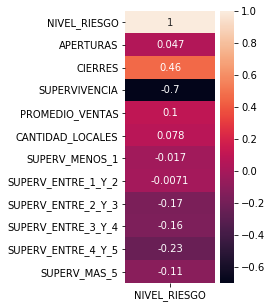

In [150]:
plt.figure(figsize=(2,5))
sns.heatmap(df.corr()[['NIVEL_RIESGO']], annot=True)

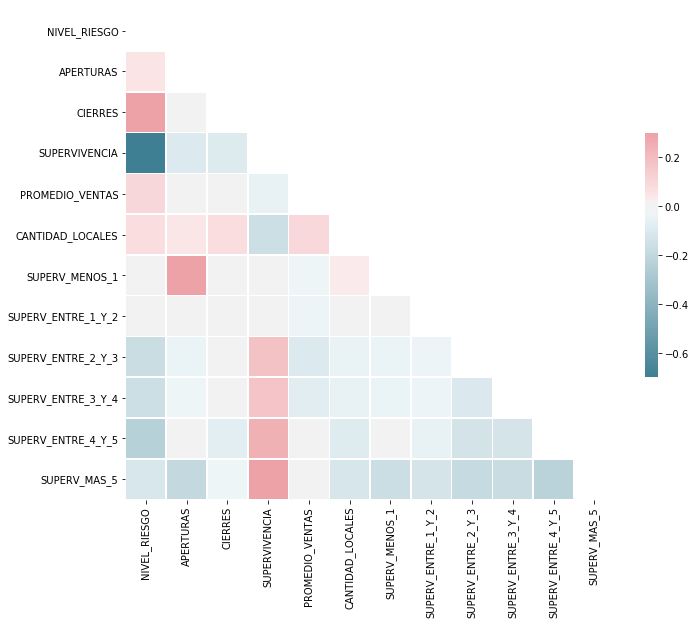

In [143]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

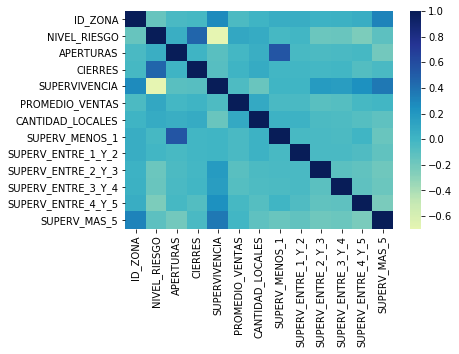

In [81]:
sns.heatmap(df.corr(), center=0, cmap="YlGnBu", annot=False);

In [82]:
df.head(3)

,PERIODO,ID_ZONA,RUBRO,NIVEL_RIESGO,APERTURAS,CIERRES,SUPERVIVENCIA,PROMEDIO_VENTAS,CANTIDAD_LOCALES,SUPERV_MENOS_1,SUPERV_ENTRE_1_Y_2,SUPERV_ENTRE_2_Y_3,SUPERV_ENTRE_3_Y_4,SUPERV_ENTRE_4_Y_5,SUPERV_MAS_5
0,Enero - Abril 2016,1,Bares y Cafés,2,0.00,0.0,0.00,1,2,0.00,100.00,0.00,0.00,0.00,0.00
1,Enero - Abril 2016,1,Carnes y Verduras,1,3.57,0.0,100.00,3,1,3.57,0.00,0.00,0.00,21.43,75.00
2,Enero - Abril 2016,1,Comida al Paso,2,2.56,0.0,58.82,3,2,5.13,7.69,10.26,5.13,10.26,61.54


In [83]:
predecir = ['NIVEL_RIESGO']
features = ['ID_ZONA', 'RUBRO', 'APERTURAS',
       'CIERRES', 'SUPERVIVENCIA', 'PROMEDIO_VENTAS', 'CANTIDAD_LOCALES', 'SUPERV_MENOS_1',
       'SUPERV_ENTRE_1_Y_2', 'SUPERV_ENTRE_2_Y_3', 'SUPERV_ENTRE_3_Y_4',
       'SUPERV_ENTRE_4_Y_5', 'SUPERV_MAS_5']

In [84]:
df['ID_ZONA'] = df['ID_ZONA'].astype(str)

In [85]:
df_final = pd.get_dummies(df[features], columns=['ID_ZONA', 'RUBRO'], drop_first=True)

In [86]:
X = df_final
y = df[predecir]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [89]:
X_train.shape

(16104, 189)

In [90]:
y_train.shape

(16104, 1)

### LogisticRegression

In [91]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver='newton-cg')

In [92]:
logistic_regression.fit(X_train_std, y_train.values.reshape(-1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
y_pred_test = logistic_regression.predict(X_test_std)

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.9735518718569566

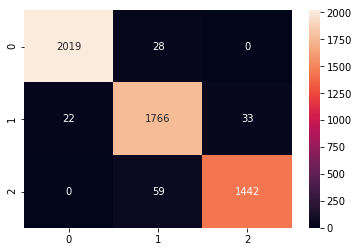

In [95]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f')

In [96]:
df['NR'] = df['NIVEL_RIESGO'].astype(str)

In [97]:
columnas = ['APERTURAS',
       'CIERRES', 'SUPERVIVENCIA', 'PROMEDIO_VENTAS', 'CANTIDAD_LOCALES', 'SUPERV_MENOS_1',
       'SUPERV_ENTRE_1_Y_2', 'SUPERV_ENTRE_2_Y_3', 'SUPERV_ENTRE_3_Y_4',
       'SUPERV_ENTRE_4_Y_5', 'SUPERV_MAS_5', 'NR']
columnas_vars = ['APERTURAS',
       'CIERRES', 'SUPERVIVENCIA']


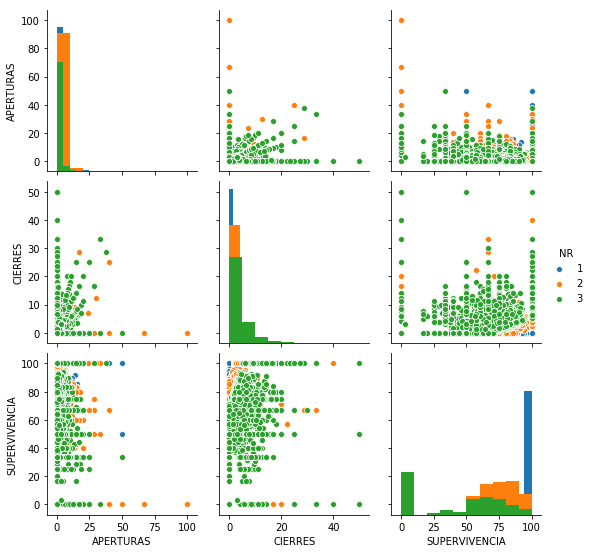

In [98]:
sns.pairplot(data=df[columnas], vars=columnas_vars, diag_kind='hist', hue='NR')

### KNeighborsClassifier

In [99]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [100]:
def scores_knn(X, y, start, stop, step):
    
    # Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto vamos a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    
    # Lista de diccionarios - la inicializamos vacío y por fuera del for loop para ir alimentándola en cada iteración
    scores_para_df = []
    
    
    for i in range(start,stop,step):
        
        # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV
        kf = KFold(n_splits=3, shuffle=True, random_state=10)
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creamos un diccionario con el valor de n_neighbours y la media y el desvío de los scores
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardamos cada uno en la lista de diccionarios
        scores_para_df.append(dict_row_score)
    
    # Creamos el DF a partir de la lista de resultados
    df_scores = pd.DataFrame(scores_para_df)
    
    # Incorporamos los límites inferior y superior, restando y sumando el valor del desvío estándar, respectivamente
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    
    # Retornamos el DF
    return df_scores

In [101]:
df_scores= scores_knn(X_train_std, y_train.values.reshape(-1), 2, 6, 1)

In [102]:
df_scores

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.631334,0.007619,2,0.623715,0.638953
1,0.619101,0.008365,3,0.610736,0.627466
2,0.624441,0.006523,4,0.617918,0.630964
3,0.615437,0.005127,5,0.610310,0.620565


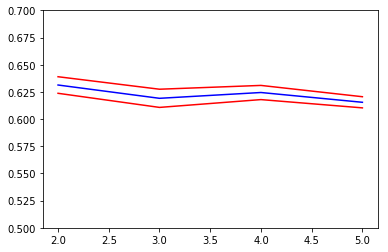

In [103]:
plt.plot(df_scores['n_neighbours'], df_scores['limite_inferior'], color='r')
plt.plot(df_scores['n_neighbours'], df_scores['score_medio'], color='b')
plt.plot(df_scores['n_neighbours'], df_scores['limite_superior'], color='r')
plt.ylim(0.5, 0.7);

In [104]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.631334,0.007619,2,0.623715,0.638953


In [105]:
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]
best_k

2

In [106]:
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train_std, y_train.values.reshape(-1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [107]:
accuracy_score(y_train, model_knn.predict(X_train_std))

0.8431445603576752

In [108]:
y_pred_knn = model_knn.predict(X_test_std)

In [109]:
accuracy_score(y_test, y_pred_knn)

0.6647420376233936

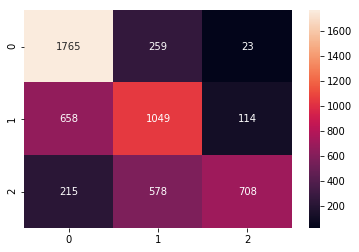

In [151]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='.0f')

### PCA + KNClassifier

In [110]:
#Veamos si mejora el score reduciendo dimensionalidad

In [111]:
from sklearn.decomposition import PCA

In [112]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');

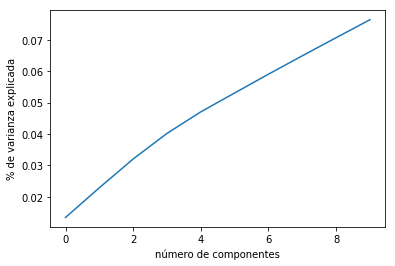

In [113]:
plot_explained_variance(components_count = 10, X = X_train_std)

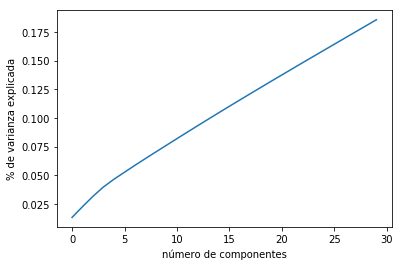

In [114]:
plot_explained_variance(components_count = 30, X = X_train_std)

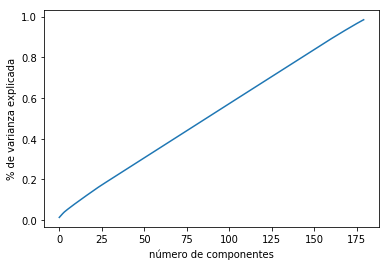

In [115]:
plot_explained_variance(components_count = 180, X = X_train_std)

In [116]:
model_pca = PCA(30).fit(X_train_std)
X_train_PCA = model_pca.transform(X_train_std)
X_test_PCA = model_pca.transform(X_test_std)

In [117]:
df_scores= scores_knn(X_train_PCA, y_train.values.reshape(-1), 2, 10, 1)

In [118]:
df_scores

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.625435,0.008431,2,0.617004,0.633866
1,0.609662,0.007681,3,0.601981,0.617344
2,0.613140,0.007965,4,0.605174,0.621105
3,0.602086,0.009232,5,0.592854,0.611319
4,0.599789,0.006283,6,0.593506,0.606072
5,0.597988,0.006339,7,0.591649,0.604327
6,0.597988,0.005440,8,0.592548,0.603428
7,0.588115,0.006128,9,0.581987,0.594243


In [119]:
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,score_std,n_neighbours,limite_inferior,limite_superior
0,0.625435,0.008431,2,0.617004,0.633866


In [120]:
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbours'].values[0]
best_k

2

In [121]:
model_knn = KNeighborsClassifier(n_neighbors=best_k)
model_knn.fit(X_train_PCA, y_train.values.reshape(-1))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [122]:
accuracy_score(y_train, model_knn.predict(X_train_PCA))

0.8322155986090413

In [153]:
y_pred_knn_PCA = model_knn.predict(X_test_PCA)

### PCA + NaiveBayes

In [125]:
from sklearn.naive_bayes import GaussianNB

In [126]:
gnb = GaussianNB()
gnb.fit(X_train_std, y_train.values.reshape(-1))

GaussianNB(priors=None, var_smoothing=1e-09)

In [127]:
accuracy_score(y_test, y_pred_knn)

0.6559880797168933

In [128]:
y_pred_nb = gnb.predict(X_test_std)

In [129]:
accuracy_score(y_test, y_pred_nb)

0.4717824548333023

In [130]:
gnb.fit(X_train_PCA, y_train.values.reshape(-1))

GaussianNB(priors=None, var_smoothing=1e-09)

In [131]:
y_pred_nb = gnb.predict(X_test_PCA)

In [132]:
accuracy_score(y_test, y_pred_nb)

0.5406965915440491

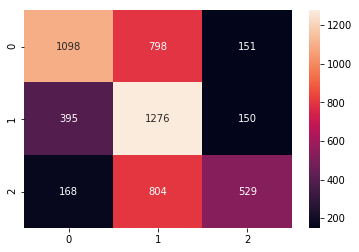

In [155]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='.0f')

###  PCA + KNRegressor

In [133]:
# instanciamos el modelo
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold
knn_regressor = KNeighborsRegressor()

In [134]:
# armamos los parámetros para GridSearchCV
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [135]:
# importamos e instanciamos el GridSearchCV
from sklearn.model_selection import GridSearchCV
folds=StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
grid = GridSearchCV(knn_regressor, param_grid, cv=folds)

In [136]:
# entrenamos el modelo
grid.fit(X_train_PCA, y_train.values.reshape(-1))

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [137]:
display(grid.best_estimator_,grid.best_score_,grid.best_params_)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='distance')

0.5060816678002276

{'n_neighbors': 10, 'weights': 'distance'}

In [138]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

y_pred_grid = grid.predict(X_test_PCA)

print('r2 = {}'.format(r2_score(y_test, y_pred_grid)))
print('MAE = {}'.format(mean_absolute_error(y_test, y_pred_grid)))
print('RMSD = {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_grid))))

r2 = 0.5159179280991912
MAE = 0.4149345012176966
RMSD = 0.5611505902185583


In [161]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_grid.reshape(-1,1)), annot=True, fmt='.0f')

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets